### 수원시 SRI 공공데이터 활용 주정차 부족 문제 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
pd.set_option('display.max_columns',None)

In [6]:
#filepath = '/content/drive/Othercomputers/Macbook_pro/dev_macbook_sync/DEV/dev_dataProj/[team]Dacon_proj/dataset' #호윤_colab환경
filepath = '../../git_ignore_file/dataset/dacon_suwon_policy_proposal/' #호윤_local환경
#filepath = '../../git_ignore_file/dataset/suwon_sri_data' #류호윤_맥북

In [20]:
survey_2024_3 = pd.read_excel(f'{filepath}/(공개용) 2024년 3분기 패널조사 데이터(가중치).xlsx') #2024년 3분기 패널조사 데이터
survey_2024_4 = pd.read_excel(f'{filepath}/(공개용) 2024년 4분기 패널조사 데이터(가중치).xlsx')#2024년 4분기 패널조사 데이터
survey_2025_1 = pd.read_excel(f'{filepath}/(공개용) 2025년 1분기 패널조사_데이터(가중치).xlsx')#2025년 1분기 패널조사_데이터
survey_2025_2 = pd.read_excel(f'{filepath}/(공개용)2025년 2분기 패널조사_데이터(가중치).xlsx')#2025년 2분기 패널조사_데이터
city_policy_data = pd.read_excel(f'{filepath}/수원시 도시정책지표 공개 데이터.xlsx') #도시정책지표 데이터
survey_2023 = pd.read_excel(f'{filepath}/(HRC250611) 2023년 수원서베이 용역_공개용 데이터(엑셀).xlsx') #2024년 수원서베이 용역 
survey_2024 = pd.read_excel(f'{filepath}/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx')#2023년 수원서베이 용역


In [21]:
parking_area = pd.read_csv('수원도시공사_공영주차장 현황_20241231.csv', encoding='cp949')

### 활용 가능한 교통 관련 문항 추출 및 분석
- 2025년 1분기
    - 문항
        - q8
            - ![q8](./sri_data_question/2025_1_q8.png)
        - 
- 공개용데이터 중 2023년 수원서베이 용역_공개용 데이터(엑셀)
    - 문항
        - 문16. 수원시 교통환경 - 1. 교통인프라 환경
        - 문29. 수원의 매력적인 장소(주관식)
        - 문48. 수원시 10대 비전(2. 편리하고 효율적인/ 첨단교통 도시)
        - 문50. 수원시 정책분야 중요도(2. 교통)
        - 문55-1. 수원시가 가장 잘 하고 있는 것(주관식)
        - 문55-2. 수원시가 시급히 걔선해야하는 것(주관식)

- 공개용데이터 중 2024년 수원서베이 용역_공개용 데이터(엑셀)
    - 문항
        - 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?
        - 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까?
        - 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까? 
        - 문62-1. 수원시가 가장 잘 하고 있는 것
        - 문62-2. 수원시가 시급히 개선해야 하는 것

In [14]:
counts =survey_2025_1['q8_3'].value_counts()

In [15]:
counts

q8_3
1    480
4    361
2    355
3    329
6    252
5    238
7     44
8     22
Name: count, dtype: int64

In [16]:
counts.values

array([480, 361, 355, 329, 252, 238,  44,  22])

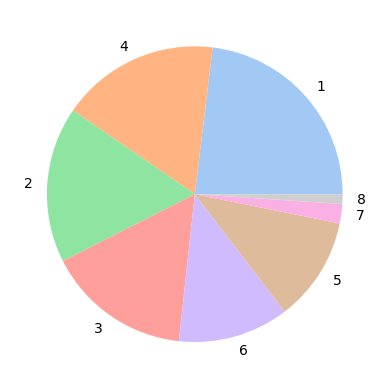

In [18]:
#2025-1, q8
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}
colors = sns.color_palette('pastel')

plt.pie(
    counts.values, labels = counts.index, colors=colors)

plt.show()

In [40]:
parking_area.head(5)


,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,운영요일,주차기본시간,주차기본요금(원),추가단위시간,추가단위요금(원),1일주차권요금적용시간,1일주차권요금(원),월정기권요금(원),결제방법,특기사항,관리기관명,전화번호,데이터기준일자
0,1,농수산물도매시장,공영,부설,권선구 세권로 243(권선동),권선구 세권로 243(권선동),748,2,연중무휴,3시간이내 1000원 / 3～6시간 2000원 / 6～9시간 이내 3000원,최초 1시간 무료,10분,200,24시간,6000,공무원 10000 / 일반 60000(입주자 승용 30000/ 화물12000),카드전용,02:00 ~ 10:00 개방,수원도시공사,031-267-2036,2024-12-31
1,2,선경도서관,공영,부설,팔달구 신풍로 23번길 68(신풍동),팔달구 신풍로 23번길 68(신풍동),65,2,연중무휴,3시간이내 1000원 / 3～6시간 2000원 / 6～9시간 이내 3000원,최초 1시간 무료,10분,300,24시간,7000,공무원10000,카드전용,없음,수원도시공사,031-695-0930,2024-12-31
2,3,영통도서관,공영,부설,영통구 영통동 청명로 151번길(영통동),영통구 영통동 청명로 151번길(영통동),79,3,연중무휴,3시간이내 1000원 / 3～6시간 2000원 / 6～9시간 이내 3000원,최초 1시간 무료,10분,100,24시간,3500,공무원10000,카드전용,없음,수원도시공사,031-695-0930,2024-12-31
3,4,시청2부설(의회부지),공영,부설,팔달구 효원로 241(인계동),팔달구 효원로 241(인계동),241,1,연중무휴,3시간이내 1000원 / 3～6시간 2000원 / 6～9시간 이내 3000원,최초 1시간 무료,10분,400,24시간,9500,공무원10000,카드전용,없음,수원도시공사,031-695-0930,2024-12-31
4,5,시청별관,공영,부설,팔달구 효원로 241(인계동),팔달구 효원로 241(인계동),350,1,연중무휴,3시간이내 1000원 / 3～6시간 2000원 / 6～9시간 이내 3000원,30분 무료,10분,400,24시간,9500,공무원12000,카드전용,평일 18시 이후 일반차량 출입제한,수원도시공사,031-695-0930,2024-12-31


In [42]:
parking_area_addr=parking_area[['주차장명','주차장구분','주차장유형','소재지도로명주소','소재지지번주소','주차구획수','운영요일']]

In [43]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import json
import requests
import os
from dotenv import load_dotenv

load_dotenv()
KAKAO_API_KEY = os.getenv("KAKAO_API_KEY")
api_key = KAKAO_API_KEY


def get_lat_lng(addr):
    headers = {
        "Authorization": f"KakaoAK {api_key}"
    }
    params = {"query": addr}
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    
    response = requests.get(url, headers=headers, params=params)
    time.sleep(0.15)
    if response.status_code == 200:
        documents = response.json().get("documents")
        if documents:
            return float(documents[0]["y"]), float(documents[0]["x"])  # 위도, 경도
    return None, None


def add_to_pos(data):
    tqdm.pandas()

    latitudes = []
    longitudes = []

    for i,(_, row) in enumerate(tqdm(data.iterrows(), total=len(data))):
        if i>0 and i%1000 == 0:
            print(f'{i} rows. 중간 딜레이 5se\n')
    
        
        lat,lng = get_lat_lng(row['소재지지번주소'])
        latitudes.append(lat)
        longitudes.append(lng)

    data['latitude'] = latitudes
    data['longitude'] = longitudes

    #display(data.head(10))
    return data


In [58]:
parking_area_addr=add_to_pos(parking_area_addr)

100%|██████████| 60/60 [00:12<00:00,  4.76it/s]
/var/folders/6r/xr0qznn91275kspzbpvxqftr0000gn/T/ipykernel_68826/393018082.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitude'] = latitudes
/var/folders/6r/xr0qznn91275kspzbpvxqftr0000gn/T/ipykernel_68826/393018082.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['longitude'] = longitudes


In [59]:
parking_area_addr.dropna(axis=0, inplace=True)

/var/folders/6r/xr0qznn91275kspzbpvxqftr0000gn/T/ipykernel_68826/2939564237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_area_addr.dropna(axis=0, inplace=True)


In [60]:
parking_area_addr.to_csv('공영주차장_위경도.csv')

In [61]:
parking_area_addr

,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,운영요일,latitude,longitude
0,농수산물도매시장,공영,부설,권선구 세권로 243(권선동),권선구 세권로 243(권선동),748,연중무휴,37.255051,127.030470
1,선경도서관,공영,부설,팔달구 신풍로 23번길 68(신풍동),팔달구 신풍로 23번길 68(신풍동),65,연중무휴,37.283862,127.010432
3,시청2부설(의회부지),공영,부설,팔달구 효원로 241(인계동),팔달구 효원로 241(인계동),241,연중무휴,37.263454,127.028662
4,시청별관,공영,부설,팔달구 효원로 241(인계동),팔달구 효원로 241(인계동),350,연중무휴,37.263454,127.028662
5,시청정문,공영,부설,팔달구 효원로 241(인계동),팔달구 효원로 241(인계동),87,연중무휴,37.263454,127.028662
6,영통구청,공영,부설,영통구 효원로 407(매탄동),영통구 효원로 407(매탄동),292,연중무휴,37.259599,127.046508
7,화성박물관(팔달구청),공영,부설,팔달구 창룡대로 21,팔달구 창룡대로 21,368,연중무휴,37.282675,127.019002
8,권선구청,공영,부설,권선구 호매실로 12,권선구 호매실로 12,258,연중무휴,37.257634,126.971898
9,광교홍재도서관,공영,부설,영통구 대학로88,영통구 대학로88,53,연중무휴,37.302936,127.047443
10,일월수목원,공영,부설,장안구 천천동 430,장안구 천천동 430,134,연중무휴,37.287953,126.976439
